<a href="https://colab.research.google.com/github/Lvaperez/Estad-stica-computarizada/blob/main/Lab12_Ejemplo_38_5_Laura_P%C3%A9rez_Vides_Prueba_De_ColaInferior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **38.5. Ejemplo 3: Prueba de cola inferior  para diferencia de medias pareadas**
## **Por: Laura Vanessa Pérez Vides**


---

## **Evaluación de un Medicamento para la Presión Arterial**

### **Ejercicio ilustrativo: Planteamiento del Problema**

Un investigador desea evaluar si un nuevo medicamento logra reducir la presión arterial sistólica en pacientes hipertensos. Para ello, se registra la presión arterial sistólica de 8 pacientes antes y después de tomar el medicamento. Se calcula la diferencia individual como:

$D_i = \text{Después} - \text{Antes}$

A partir de estos datos, se obtiene lo siguiente:

Media de las diferencias: $\bar{d} = -2.5$ mmHg

Desviación estándar de las diferencias: $s_d = 1.5$ mmHg

Tamaño de la muestra: $n = 8$ pacientes

Nivel de significancia: $\alpha = 0.05$

¿Existe evidencia estadística suficiente para afirmar que el medicamento reduce la presión arterial sistólica?

---

### **Paso 1: Formulación de hipótesis**

Como se desea verificar si la presión arterial disminuye, se trata de una prueba de una cola (cola inferior):

* **Hipótesis nula: $H_0:** \mu_d = 0$ (el medicamento no tiene efecto)

* **Hipótesis alternativa: $H_1:** \mu_d < 0$ (el medicamento reduce la presión arterial)

---

### **Paso 2: Cálculo del estadístico de prueba**
Se utiliza la prueba t para datos pareados, dado que las mediciones antes y después provienen de los mismos pacientes:

$$
t = \frac{\bar{d} - \mu_0}{s_d / \sqrt{n}} = \frac{-2.5 - 0}{1.5 / \sqrt{8}} = \frac{-2.5}{0.5303} \approx -4.714
$$

---

### **Paso 3: Valor crítico de t**


Grados de libertad: $gl = n - 1 = 7$

Para una prueba unilateral con $\alpha = 0.05$ y $df = 7$, el valor crítico es aproximadamente:

$$
t_{0.05, 7} \approx -1.895
$$

---

### **Paso 4: Regla de decisión**
Comparando los valores:

$t_{\text{calculado}} = -4.714$

$t_{\text{crítico}} = -1.895$

Como:

$$ t = -4.714 < -1.895 $$

**Rechazamos la hipótesis nula** porque el valor t calculado cae en la región crítica, lo que indica que la diferencia observada no se puede atribuir al azar. Por tanto, hay evidencia suficiente para afirmar que el medicamento reduce la presión arterial sistólica.

---

### **Evaluación del efecto con base en evidencia estadística.**

Con base en los resultados de la prueba t para muestras pareadas, se encontró una diferencia estadísticamente significativa en los niveles de presión arterial sistólica antes y después del tratamiento ($t = -4.714$, $p < 0.05$). Esto indica que el medicamento evaluado tiene un efecto reductor sobre la presión arterial. A pesar del tamaño muestral pequeño, la magnitud del efecto y la baja probabilidad de que este resultado se deba al azar respaldan la conclusión de que el tratamiento es efectivo, aunque se recomienda ampliar el estudio para fortalecer su validez externa.

---


In [1]:
# Instalar R y rpy2
!apt-get install -y r-base
!pip install rpy2
# Importar rpy2 para ejecutar código en R
%load_ext rpy2.ipython
#%%R

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-base is already the newest version (4.5.1-1.2204.0).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


## **Códigos en R Studio para Prueba de Hipótesis Pareada**

Estadístico t: -4.714 
Valor p: 0.001086 
Rechazamos la hipótesis nula.


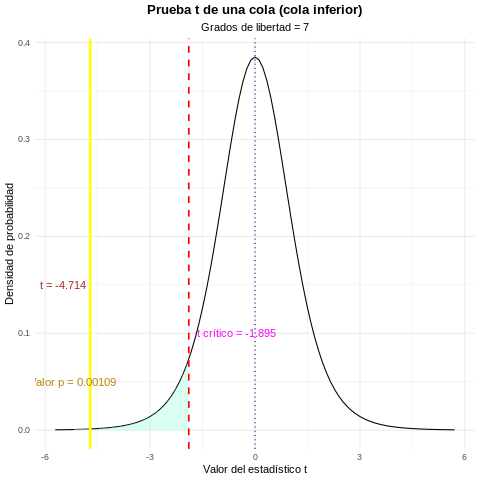

In [5]:
%%R
# Datos resumidos
media_d <- -2.5
sd_d <- 1.5
n <- 8
alfa <- 0.05
gl <- n - 1

# Calcular el estadístico de prueba t
t_estadistico <- (media_d - 0) / (sd_d / sqrt(n))
cat("Estadístico t:", round(t_estadistico, 4), "\n")
# Calcular el valor p (prueba de cola inferior)
p_valor <- pt(t_estadistico, df = gl, lower.tail = TRUE)
cat("Valor p:", format.pval(p_valor, digits = 4), "\n")
# Decisión
if (p_valor <= alfa) {
  cat("Rechazamos la hipótesis nula.\n")
} else {
  cat("No rechazamos la hipótesis nula.\n")
}
# Visualización mejorada
library(ggplot2)

# Calculamos valores importantes
t_critico <- qt(alfa, df = gl)
x_vals <- seq(min(-4, t_estadistico - 1), max(4, abs(t_estadistico) + 1), 0.01)

ggplot(data.frame(x = x_vals), aes(x = x)) +
  # Distribución base
  stat_function(fun = dt, args = list(df = gl)) +

  # Región crítica (roja)
  geom_area(data = subset(data.frame(x = x_vals), x < t_critico),
            aes(y = dt(x, df = gl)), fill = "aquamarine", alpha = 0.3) +

  # Valor p (amarillo)
  geom_area(data = subset(data.frame(x = x_vals), x < t_estadistico),
            aes(y = dt(x, df = gl)), fill = "pink", alpha = 0.3) +

  # Líneas de referencia
  geom_vline(xintercept = t_critico, linetype = "dashed", color = "red", linewidth = 0.8) +
  geom_vline(xintercept = t_estadistico, color = "yellow", linewidth = 1.2) +
  geom_vline(xintercept = 0, color = "navy", linetype = "dotted") +

  # Anotaciones
  annotate("text", x = t_critico, y = 0.1,
           label = paste("t crítico =", round(t_critico, 3)),
           color = "magenta", hjust = -0.1) +

  annotate("text", x = t_estadistico, y = 0.15,
           label = paste("t =", round(t_estadistico, 3)),
           color = "brown", hjust = 1.1) +

  annotate("text", x = mean(c(min(x_vals), t_estadistico)), y = 0.05,
           label = paste("Valor p =", format.pval(p_valor, digits = 3)),
           color = "darkgoldenrod", size = 4) +

  # Configuración del gráfico
  labs(title = "Prueba t de una cola (cola inferior)",
       subtitle = paste("Grados de libertad =", gl),
       x = "Valor del estadístico t",
       y = "Densidad de probabilidad") +

  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5, face = "bold"),
        plot.subtitle = element_text(hjust = 0.5))

## **Código en Python para Prueba de Hipótesis Pareada**

Estadístico t: -4.714
Valor p: 0.0011
Rechazamos la hipótesis nula.


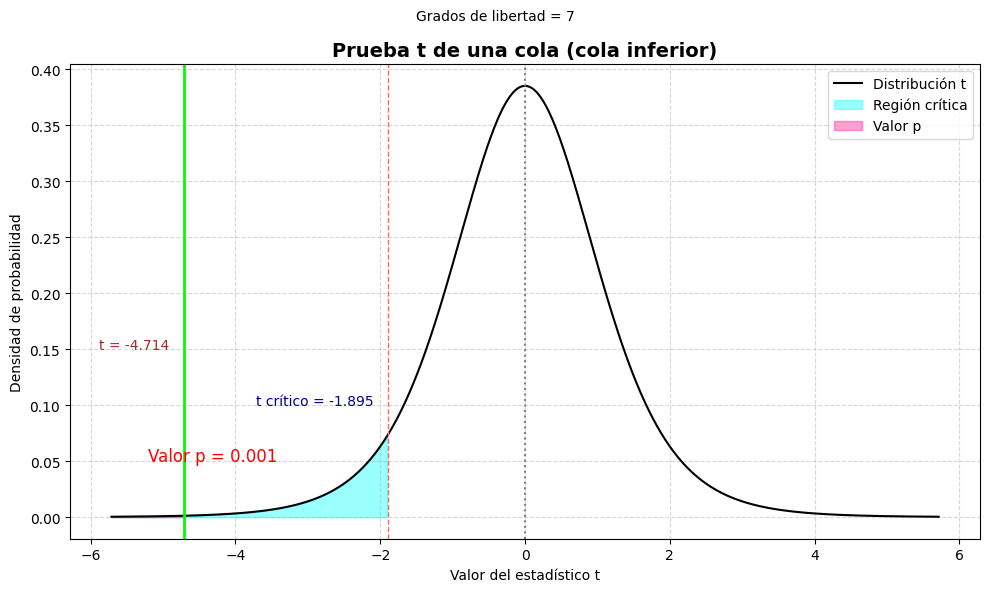

In [13]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Datos resumidos
media_d = -2.5
sd_d = 1.5
n = 8
alfa = 0.05
gl = n - 1

# Cálculo del estadístico t
t_estadistico = (media_d - 0) / (sd_d / np.sqrt(n))
print(f"Estadístico t: {round(t_estadistico, 4)}")

# Valor p (cola inferior)
p_valor = stats.t.cdf(t_estadistico, df=gl)
print(f"Valor p: {round(p_valor, 4)}")

# Decisión
if p_valor <= alfa:
    print("Rechazamos la hipótesis nula.")
else:
    print("No rechazamos la hipótesis nula.")

# Visualización
t_critico = stats.t.ppf(alfa, df=gl)
x_vals = np.linspace(min(-4, t_estadistico - 1), max(4, abs(t_estadistico) + 1), 1000)
y_vals = stats.t.pdf(x_vals, df=gl)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, color="black", label="Distribución t")

# Región crítica (gris pastel)
plt.fill_between(x_vals, 0, y_vals, where=(x_vals < t_critico),
                 color="cyan", alpha=0.4, label="Región crítica")

# Valor p (rosado pastel)
plt.fill_between(x_vals, 0, y_vals, where=(x_vals < t_estadistico),
                 color="deeppink", alpha=0.4, label="Valor p")

# Líneas de referencia
plt.axvline(t_critico, linestyle="--", color="#FF6961", linewidth=1)
plt.axvline(t_estadistico, color="lime", linewidth=2)
plt.axvline(0, linestyle=":", color="gray")

# Anotaciones
plt.text(t_critico - 0.2, 0.1, f"t crítico = {round(t_critico, 3)}", color="darkblue", ha='right')
plt.text(t_estadistico - 0.2, 0.15, f"t = {round(t_estadistico, 3)}", color="brown", ha='right')
plt.text((min(x_vals) + t_estadistico) / 2, 0.05,
         f"Valor p = {round(p_valor, 3)}", color="red", fontsize=12)

# Etiquetas y estilo
plt.title("Prueba t de una cola (cola inferior)", fontsize=14, weight='bold')
plt.suptitle(f"Grados de libertad = {gl}", fontsize=10)
plt.xlabel("Valor del estadístico t")
plt.ylabel("Densidad de probabilidad")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
